In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import time

Загружаем данные, разделяем на тестовые и тренировочные.

In [5]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Text(0, 0.5, 'F1')

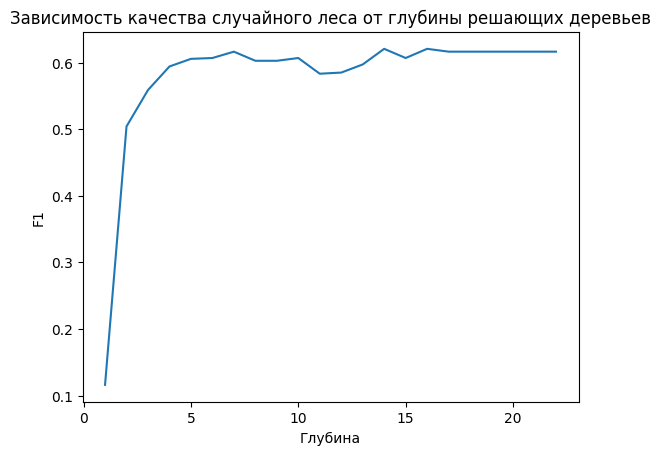

In [58]:
depths = list(range(1, 23))
f1s = []
for depth in depths:
    clf = RandomForestClassifier(max_depth=depth, random_state=121)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1s.append(f1_score(y_test, y_pred))
plt.plot(depths, f1s)
plt.title("Зависимость качества случайного леса от глубины решающих деревьев")
plt.xlabel("Глубина")
plt.ylabel("F1")

Качество при увеличении деревьев сначала растет до 7-8 деревьев, а затем почти не изменяется 

Text(0, 0.5, 'F1')

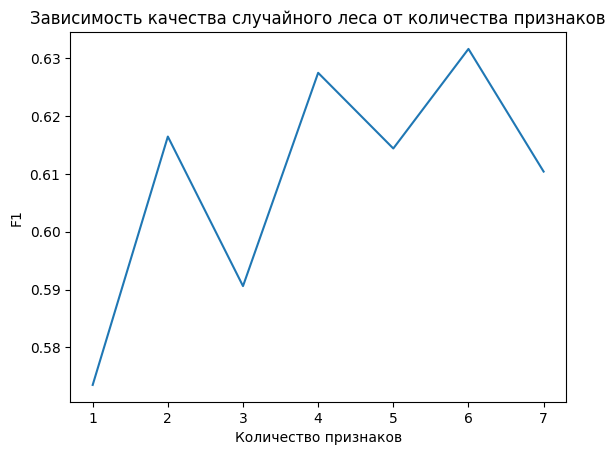

In [59]:
features = list(range(1, X.shape[1]))
f1s = []
for feature in features:
    clf = RandomForestClassifier(max_features=feature, random_state=121)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1s.append(f1_score(y_test, y_pred))
plt.plot(features, f1s)
plt.title("Зависимость качества случайного леса от количества признаков")
plt.xlabel("Количество признаков")
plt.ylabel("F1")

Качество получилось лучшим при 4-6 признаках 

Text(0, 0.5, 'F1')

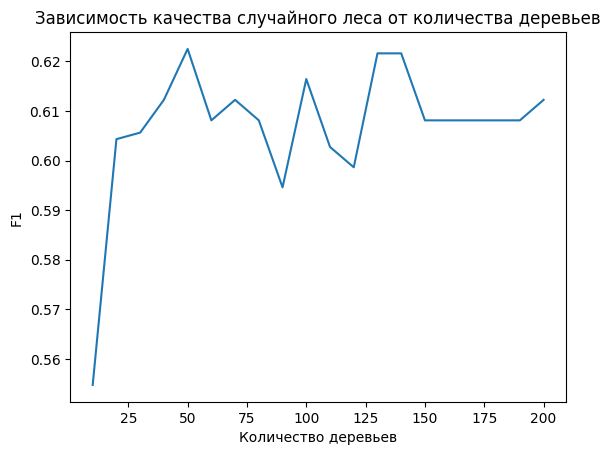

In [60]:
trees = list(range(10, 210, 10))
f1s = []
times = []
for tree in trees:
    start_time = time.time()
    clf = RandomForestClassifier(n_estimators=tree, random_state=121)
    times.append(time.time() - start_time)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1s.append(f1_score(y_test, y_pred))
plt.plot(trees, f1s)
plt.title("Зависимость качества случайного леса от количества деревьев")
plt.xlabel("Количество деревьев")
plt.ylabel("F1")

При маленьком колчичестве деревьев качество плохой. При увеличении качество начинает, в силу переобучения, колебаться в диапозоне 0.6-0.62.

Text(0, 0.5, 'Скорость обучения')

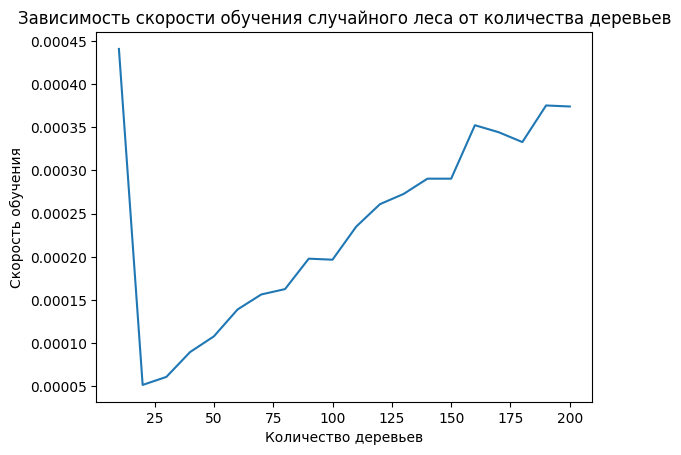

In [61]:
plt.plot(trees, times)
plt.title("Зависимость скорости обучения случайного леса от количества деревьев")
plt.xlabel("Количество деревьев")
plt.ylabel("Скорость обучения")

Скорость обучения случайного леса прямо пропорциональна числу деревьев.

Обучим XGBoost и подберем его гиперпараметры

In [22]:
from xgboost import XGBClassifier

In [94]:
bst = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8, random_state=121)
start_time = time.time()
bst.fit(X_train, y_train)
time_for_fit = time.time() - start_time
preds = bst.predict(X_test)
print("F1:", f1_score(y_test, preds))
print("Время обучения:", time_for_fit)

F1: 0.6666666666666667
Время обучения: 0.045055389404296875


Качество XGBoost с подобранными гиперпараметрами оказалось сильно лучше, чем качество всех рассмотренных моделей случайного леса. Время обучения при этом меньше.